In [1]:
! pip install yfinance


  Using cached yfinance-0.2.44-py2.py3-none-any.whl.metadata (13 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.6.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached yfinance-0.2.44-py2.py3-none-any.whl (94 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138939 sha256=b210e5550f9dca48b4d1efa572

In [5]:
! pip install keras  

In [1]:
import pandas as pd

In [6]:
! pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)


In [7]:
! pip install statsmodels

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.8 MB 2.5 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.8 MB 2.1 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.8 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.8 MB 2.4 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 2.3 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 2.2 MB/s eta 0:00:03
   ------------------ ---------------------

In [2]:
df = pd.read_csv(r'D:\My_project\ml_project\notebook\meta_stock.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2020,206.750000,209.789993,206.270004,209.779999,209.557648,12077100
1,03-01-2020,207.210007,210.399994,206.949997,208.669998,208.448837,11188400
2,06-01-2020,206.699997,212.779999,206.520004,212.600006,212.374680,17058900
3,07-01-2020,212.820007,214.580002,211.750000,213.059998,212.834183,14912400
4,08-01-2020,213.000000,216.240005,212.610001,215.220001,214.991898,13475000


In [8]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.figure_factory as ff
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [14]:
from sklearn.metrics import mean_squared_error

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
print("==================STOCK INFORMATION=================")
print(df.info())

==================STOCK INFORMATION=================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1089 non-null   object 
 1   Open       1089 non-null   float64
 2   High       1089 non-null   float64
 3   Low        1089 non-null   float64
 4   Close      1089 non-null   float64
 5   Adj Close  1089 non-null   float64
 6   Volume     1089 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.7+ KB
None


In [13]:
print("==================DESCRIPTIVE STATISTICS=================")
print(df.describe())

==================DESCRIPTIVE STATISTICS=================
              Open         High          Low        Close    Adj Close  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean    265.106492   269.017264   261.475758   265.279651   265.021994   
std      89.310933    89.910210    88.447719    89.178666    89.144503   
min      90.080002    90.459999    88.089996    88.910004    88.815765   
25%     200.149994   203.500000   195.490005   198.860001   198.649231   
50%     267.170013   270.320007   263.600006   266.630005   266.347412   
75%     323.529999   328.000000   319.459991   324.170013   323.826416   
max     529.280029   531.489990   518.890015   527.340027   527.340027   

             Volume  
count  1.089000e+03  
mean   2.474032e+07  
std    1.618508e+07  
min    5.467500e+06  
25%    1.590590e+07  
50%    2.084450e+07  
75%    2.861860e+07  
max    2.323166e+08  


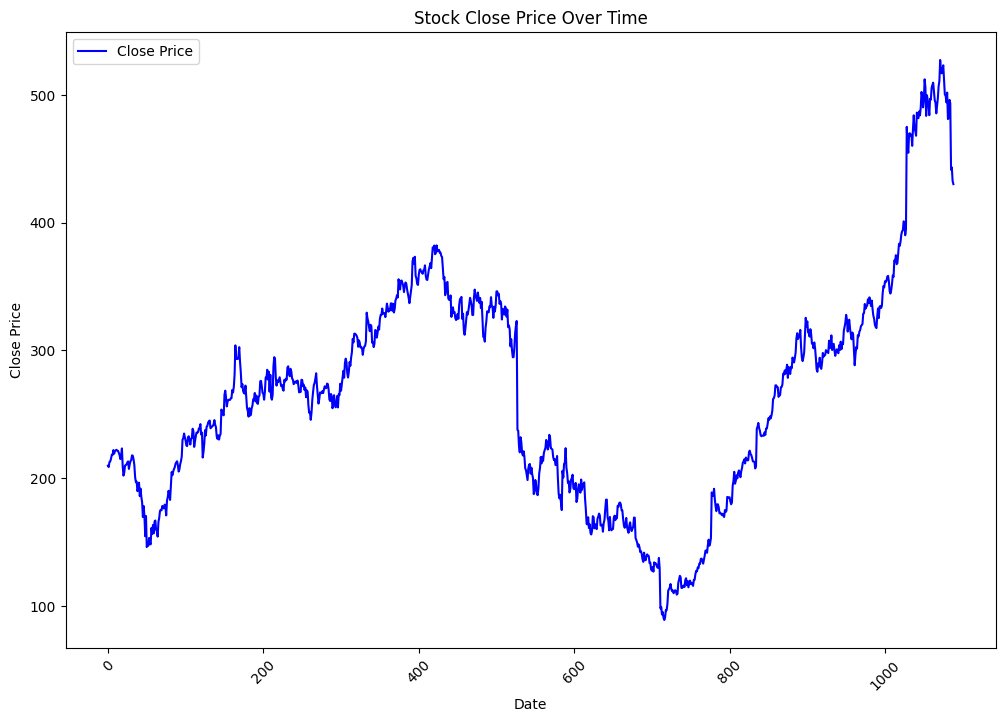

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [16]:
df['Daily Returns'] = df['Close'].pct_change().dropna()

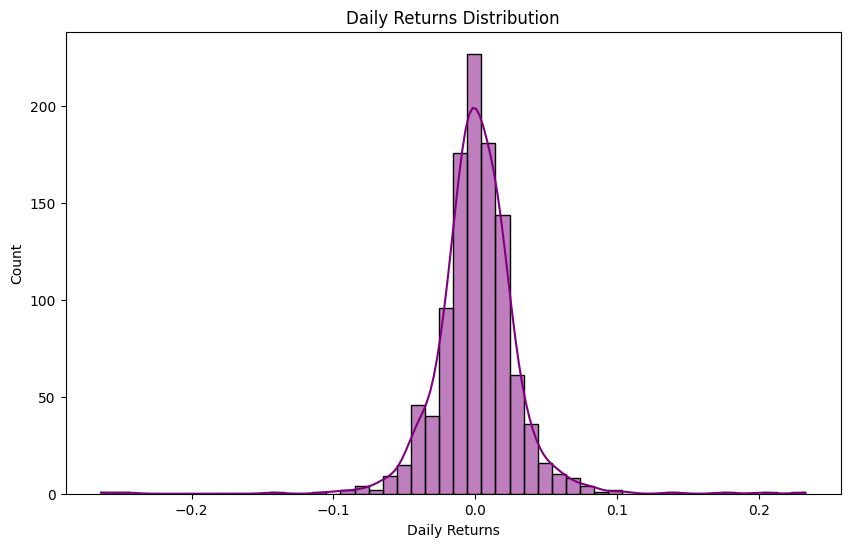

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Returns'], bins=50, kde=True, color='purple')
plt.title('Daily Returns Distribution')
plt.show()